In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import json

from PIL import Image

import torch
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms

preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

from model import EarthVisionModel

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        _dict = pickle.load(fo, encoding='bytes')
    return _dict

label_meta = unpickle("./meta")

In [3]:
len(label_meta[b"fine_label_names"])

100

In [4]:
label_meta

{b'fine_label_names': [b'apple',
  b'aquarium_fish',
  b'baby',
  b'bear',
  b'beaver',
  b'bed',
  b'bee',
  b'beetle',
  b'bicycle',
  b'bottle',
  b'bowl',
  b'boy',
  b'bridge',
  b'bus',
  b'butterfly',
  b'camel',
  b'can',
  b'castle',
  b'caterpillar',
  b'cattle',
  b'chair',
  b'chimpanzee',
  b'clock',
  b'cloud',
  b'cockroach',
  b'couch',
  b'crab',
  b'crocodile',
  b'cup',
  b'dinosaur',
  b'dolphin',
  b'elephant',
  b'flatfish',
  b'forest',
  b'fox',
  b'girl',
  b'hamster',
  b'house',
  b'kangaroo',
  b'keyboard',
  b'lamp',
  b'lawn_mower',
  b'leopard',
  b'lion',
  b'lizard',
  b'lobster',
  b'man',
  b'maple_tree',
  b'motorcycle',
  b'mountain',
  b'mouse',
  b'mushroom',
  b'oak_tree',
  b'orange',
  b'orchid',
  b'otter',
  b'palm_tree',
  b'pear',
  b'pickup_truck',
  b'pine_tree',
  b'plain',
  b'plate',
  b'poppy',
  b'porcupine',
  b'possum',
  b'rabbit',
  b'raccoon',
  b'ray',
  b'road',
  b'rocket',
  b'rose',
  b'sea',
  b'seal',
  b'shark',
  b'shre

In [ ]:
model = EarthVisionModel()
model.load_state_dict(torch.load("state_dict.pt"))
model.eval()

In [6]:
flag = np.zeros((32,256))

In [8]:
dataset = datasets.ImageFolder('test_X', transform=preprocess)
dataset.targets = label_meta

In [9]:
batch_size = 1
dataloader = torch.utils.data.DataLoader(dataset, shuffle=False, batch_size=batch_size)

In [14]:
i = 0
data_dict = {}
for img in dataloader:
	img_name = dataloader.sampler.data_source.imgs[i][0]

	#plt.figure()
	#plt.imshow(img[0][0].permute(1, 2, 0))
	#print(img_name)
	
	i += 1
	
	pred = model(torch.unsqueeze(img[0][0], 0))
	m = torch.argmax(pred)
	res = str(label_meta[b"fine_label_names"][m])[2:-1]
	#print("model result %s" % res)
	#plt.figure()
	#plt.imshow(img.permute(1, 2, 0).detach().numpy() * np.array([0.224, 0.225, 0.229]) + np.array([0.456, 0.406, 0.485]))
	#print(list(data_dict.keys())[i])
	data_dict[os.path.basename(img_name)] = res

In [27]:
data_dict

{'0.jpg': 'bridge',
 '1.jpg': 'castle',
 '10.jpg': 'forest',
 '100.jpg': 'castle',
 '1000.jpg': 'bridge',
 '1001.jpg': 'house',
 '1002.jpg': 'road',
 '1003.jpg': 'plain',
 '1004.jpg': 'road',
 '1005.jpg': 'bridge',
 '1006.jpg': 'elephant',
 '1007.jpg': 'road',
 '1008.jpg': 'house',
 '1009.jpg': 'bridge',
 '101.jpg': 'tank',
 '1010.jpg': 'road',
 '1011.jpg': 'streetcar',
 '1012.jpg': 'skyscraper',
 '1013.jpg': 'castle',
 '1014.jpg': 'bus',
 '1015.jpg': 'skyscraper',
 '1016.jpg': 'castle',
 '1017.jpg': 'whale',
 '1018.jpg': 'bridge',
 '1019.jpg': 'road',
 '102.jpg': 'bridge',
 '1020.jpg': 'bridge',
 '1021.jpg': 'bridge',
 '1022.jpg': 'bridge',
 '1023.jpg': 'house',
 '1024.jpg': 'can',
 '1025.jpg': 'bridge',
 '1026.jpg': 'bridge',
 '1027.jpg': 'castle',
 '1028.jpg': 'streetcar',
 '1029.jpg': 'road',
 '103.jpg': 'road',
 '1030.jpg': 'skyscraper',
 '1031.jpg': 'bridge',
 '1032.jpg': 'bridge',
 '1033.jpg': 'bridge',
 '1034.jpg': 'road',
 '1035.jpg': 'road',
 '1036.jpg': 'castle',
 '1037.jpg'

In [34]:
for k, v in data_dict.items():
    y = int(k.split(".")[0])
    #print(y, y%256, y//256)
    flag[y//256][y%256] = 0
    if data_dict[k] in ["baby", "boy", "girl", "man", "woman"]:
        flag[y//256][y%256] = 1

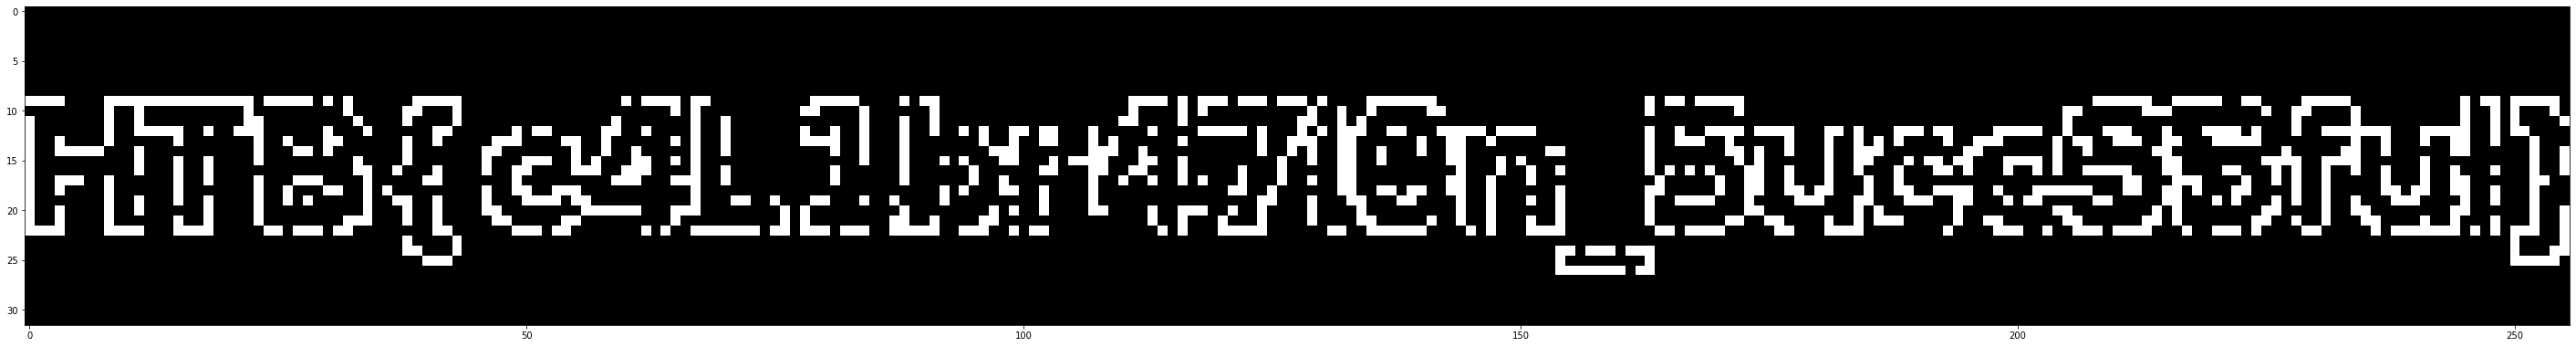

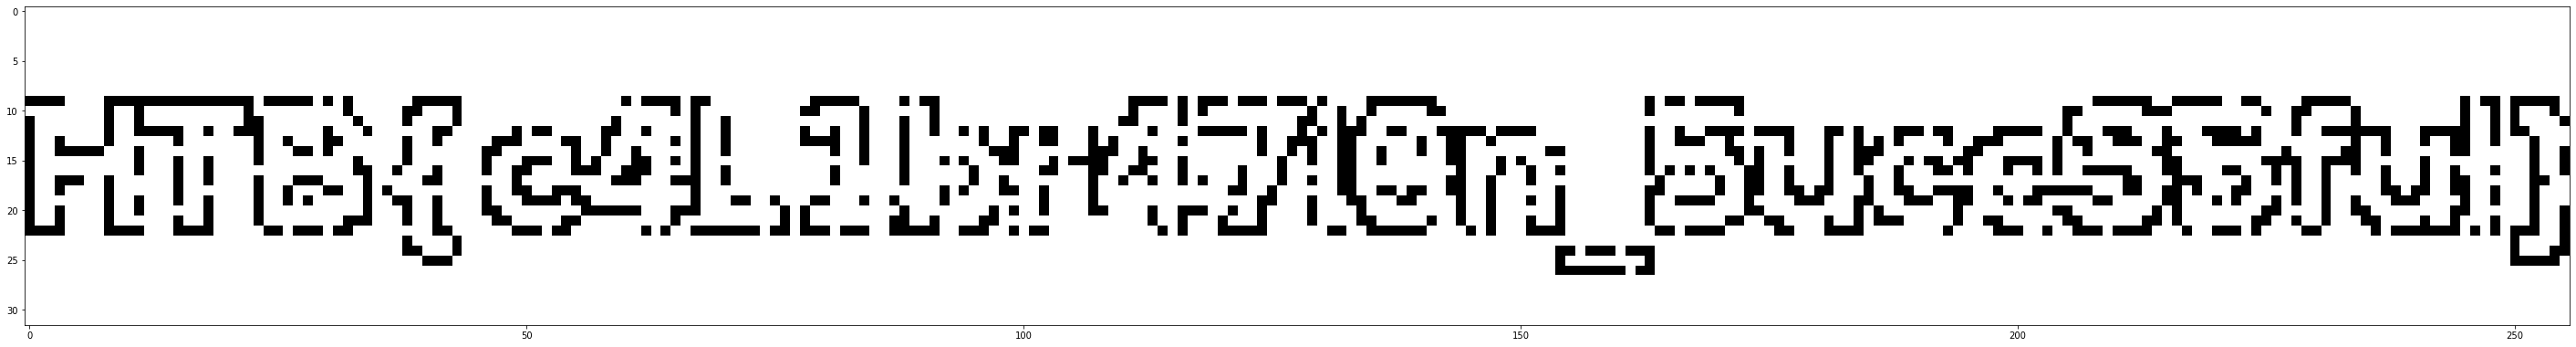

In [35]:
plt.figure(figsize=(50, 50))
plt.imshow(flag, cmap="gray")
plt.figure(figsize=(50, 50))
plt.imshow(flag, cmap="gray_r")